In [30]:
# ml_philip.ipynb
# Machine Learning with the Titanic Dataset
# Philip Fowler
# 14 March 2025
# This notebook is a simple example of machine learning using the Titanic dataset.
# The goal is to predict whether a passenger survived the Titanic disaster based on their attributes.
# The dataset is available from the Seaborn library.

# install libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix

# Load Titanic dataset
titanic = sns.load_dataset('titanic')


In [31]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [32]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [33]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [34]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [35]:
titanic.corr(numeric_only=True)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


1) How many data instances are there? 891
2) How many features are there? 15
3) What are the names? 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']
4) Are there any missing values? Yes, mostly in age and deck.  2 from embark town and embarked
5) Are there any non-numeric features? Yes, sex, embarked, class, who, adult_male, deck, embark_town, alive, alone

6) Are the data instances sorted on any of the attributes? No
7) What are the units of age? Years
8) What are the minimum, median and max age? min: 0.42, median: 28.0, max: 80.0
9) What two different features have the highest correlation?

10) Are there any categorical features that might be useful for prediction? I know a bit about this dataset, so I know that sex and passenger class are important features for predicting survival.

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='fare', ylabel='age'>,
        <Axes: xlabel='pclass', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='fare'>,
        <Axes: xlabel='fare', ylabel='fare'>,
        <Axes: xlabel='pclass', ylabel='fare'>],
       [<Axes: xlabel='age', ylabel='pclass'>,
        <Axes: xlabel='fare', ylabel='pclass'>,
        <Axes: xlabel='pclass', ylabel='pclass'>]], dtype=object)

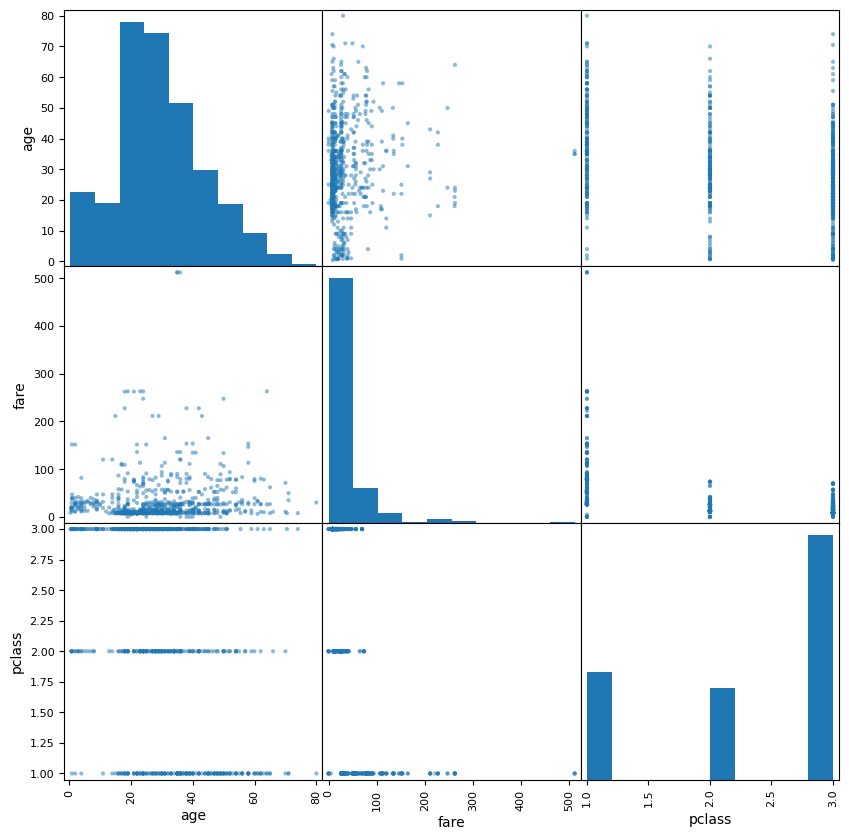

In [36]:
attributes = ['age', 'fare', 'pclass']
scatter_matrix(titanic[attributes], figsize=(10, 10))

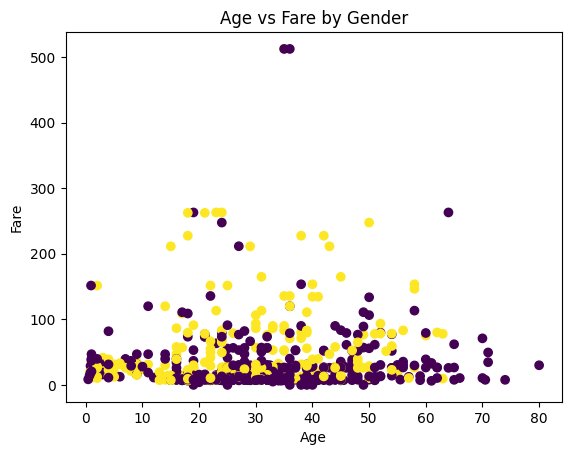

In [37]:
plt.scatter(titanic['age'], titanic['fare'], c=titanic['sex'].apply(lambda x: 0 if x == 'male' else 1))
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare by Gender')
plt.show()

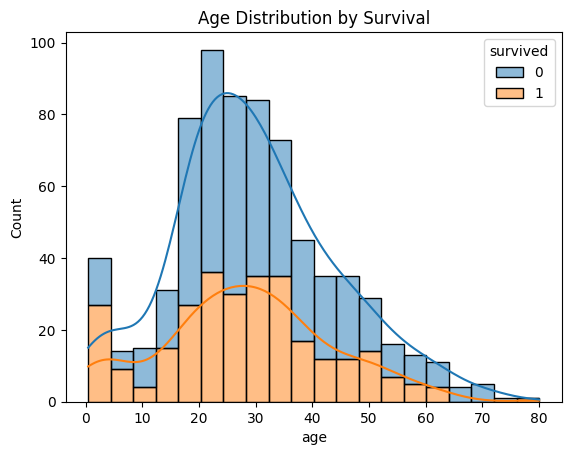

In [38]:
sns.histplot(data=titanic, x='age', hue='survived', kde=True, multiple='stack')
plt.title('Age Distribution by Survival')
plt.show()

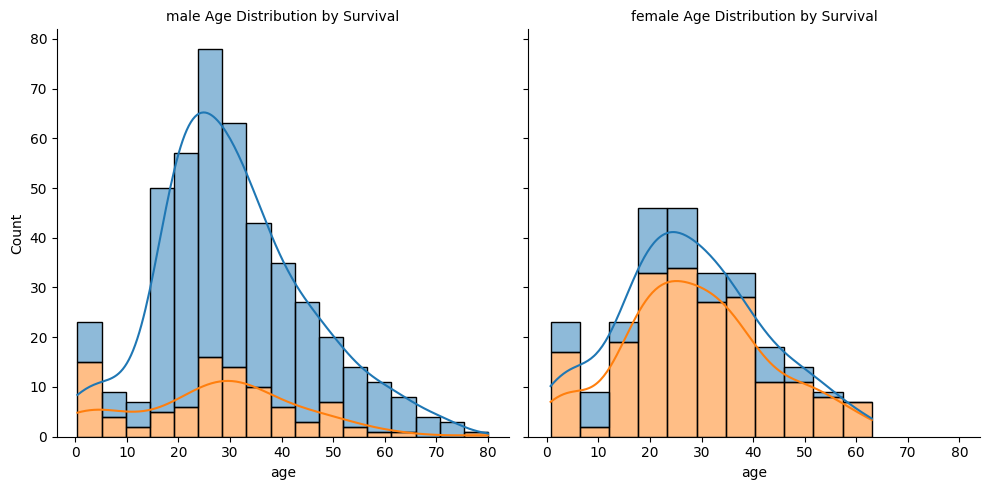

In [39]:
g = sns.FacetGrid(titanic, col="sex", height=5, aspect=1)
g.map(sns.histplot, "age", hue="survived", data=titanic, kde=True, multiple="stack")
g.set_titles("{col_name} Age Distribution by Survival")
plt.show()

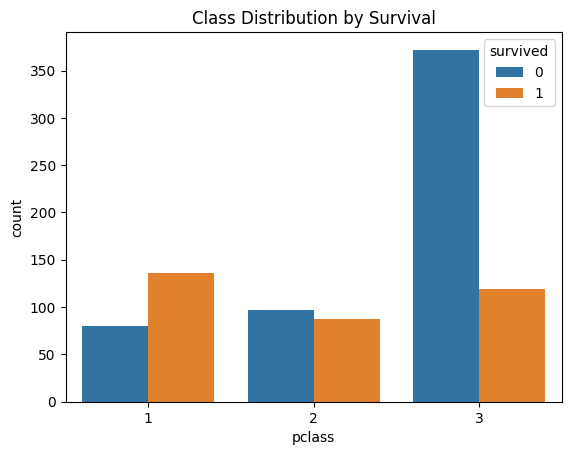

In [40]:
sns.countplot(x='pclass', hue='survived', data=titanic)
plt.title('Class Distribution by Survival')
plt.show()

Reflection 2.1:


1. What patterns or anomalies do you notice? third class passengers are more likely to not survive
2. Do any features stand out as potential predictors? class and sex
3. Are there any visible class imbalances? Yes, in third class passengers

In [41]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())
titanic['embark_town'] = titanic['embark_town'].fillna(titanic['embark_town'].mode()[0])


In [42]:
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

titanic['alone'] = titanic['alone'].astype(int)


Reflection 2.3

Why might family size be a useful feature for predicting survival? Perhaps being together with family increased the likelihood of survival.  This would certainly be true for small children.
Why convert categorical data to numeric? It is easier to work with numeric data in machine learning models.



In [43]:
X = titanic[['age', 'fare', 'pclass', 'sex', 'family_size']]
y = titanic['survived']

Reflection 3:

Why are these features selected? These are the features that appear to be the best for predicting survival.
Are there any features that are likely to be highly predictive of survival? 

In [44]:
dont_panic = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=dont_panic)

print('Train size:', len(X_train))
print('Test size:', len(X_test))

Train size: 712
Test size: 179


In [45]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    train_set = X.iloc[train_indices]
    test_set = X.iloc[test_indices]

print('Train size:', len(train_set))
print('Test size:', len(test_set))

Train size: 712
Test size: 179


In [46]:
print("Original Class Distribution:\n", y.value_counts(normalize=True))
print("Train Set Class Distribution:\n", train_set['pclass'].value_counts(normalize=True))
print("Test Set Class Distribution:\n", test_set['pclass'].value_counts(normalize=True))

Original Class Distribution:
 survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64
Train Set Class Distribution:
 pclass
3    0.561798
1    0.227528
2    0.210674
Name: proportion, dtype: float64
Test Set Class Distribution:
 pclass
3    0.508380
1    0.301676
2    0.189944
Name: proportion, dtype: float64


Reflection 4:

Why might stratification improve model performance?  Stratification ensures that the train and test sets have the same class percentages.  
How close are the training and test distributions to the original dataset? The training and test sets are very close to the original dataset.  The class percentages are almost identical.
Which split method produced better class balance? Stratified split